# Introduction to Pandas

Inspired by Tamás Gál 


In [251]:
%matplotlib inline
import pandas as pd
import matplotlib as ml
import sys
import numpy as np
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}"
      .format(sys.version, pd.__version__, ml.__version__))

Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
Pandas version: 0.24.1
Matplotlib version: 3.0.2


## The basic data structures in Pandas

### `DataFrame`

In [253]:
dseries = {'math' : pd.Series([10,5,17], index=['bob', 'alice', 'dan']),
     'french' : pd.Series([7, 12, 15, 13], index=['dan', 'alice', 'bob', 'nancy'])}



In [254]:
df = pd.DataFrame(dseries)
df

,math,french
alice,5.0,12
bob,10.0,15
dan,17.0,7
nancy,NaN,13


In [255]:
type(df)

pandas.core.frame.DataFrame

### `Series`

In [256]:
df['math']

alice     5.0
bob      10.0
dan      17.0
nancy     NaN
Name: math, dtype: float64

In [257]:
type(df['math'])  

pandas.core.series.Series

In [258]:
df['math'] * 23

alice    115.0
bob      230.0
dan      391.0
nancy      NaN
Name: math, dtype: float64

In [259]:
np.cos(df['math'])

alice    0.283662
bob     -0.839072
dan     -0.275163
nancy         NaN
Name: math, dtype: float64

In [260]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    2
1    5
2    6
3    6
4    5
dtype: int64

In [261]:
s.sort_values()  # indices are kept!

0    2
1    5
4    5
2    6
3    6
dtype: int64

## Examining a `DataFrame`

In [262]:
df

,math,french
alice,5.0,12
bob,10.0,15
dan,17.0,7
nancy,NaN,13


In [263]:
df.dtypes

math      float64
french      int64
dtype: object

In [264]:
df.columns

Index(['math', 'french'], dtype='object')

In [265]:
df.shape

(4, 2)

### Looking into the data

In [266]:
df.head(2)

,math,french
alice,5.0,12
bob,10.0,15


In [267]:
df.tail(2)

,math,french
dan,17.0,7
nancy,NaN,13


In [268]:
df.describe()

,math,french
count,3.000000,4.00000
mean,10.666667,11.75000
std,6.027714,3.40343
min,5.000000,7.00000
25%,7.500000,10.75000
50%,10.000000,12.50000
75%,13.500000,13.50000
max,17.000000,15.00000


### Using `.loc[]`

This one treats the input as label or "row-name".

In [269]:
df.index


Index(['alice', 'bob', 'dan', 'nancy'], dtype='object')

In [281]:
df.loc['alice']

math       5.0
french    12.0
Name: alice, dtype: float64

In [271]:
type(df.loc['alice'])

pandas.core.series.Series

In [272]:

df.index

Index(['alice', 'bob', 'dan', 'nancy'], dtype='object')

#### Accessing multiple rows/columns

In [276]:
df.loc[['alice','bob'],['math']]

,math
alice,5.0
bob,10.0


### Using `.iloc[]`

In [282]:
df.iloc[0]

math       5.0
french    12.0
Name: alice, dtype: float64

In [283]:
df.iloc[-1]

math       NaN
french    13.0
Name: nancy, dtype: float64

## Grouped operations

In [286]:
df = pd.DataFrame({'location' : ['chambery', 'annecy', 'chambery', 'annecy',
                                 'annecy', 'chambery', 'annecy', 'chambery'],
                   'course' : ['math', 'math', 'french', 'french', 'french', 'french', 'french', 'math'],
                   'rate' : np.random.randint(20,size=8),
                   'time' : np.random.randint(3, size=8)})
df

,location,course,rate,time
0,chambery,math,11,2
1,annecy,math,13,1
2,chambery,french,19,2
3,annecy,french,13,2
4,annecy,french,7,1
5,chambery,french,6,0
6,annecy,french,13,0
7,chambery,math,4,1


In [287]:
df.groupby(['location']).groups

{'annecy': Int64Index([1, 3, 4, 6], dtype='int64'),
 'chambery': Int64Index([0, 2, 5, 7], dtype='int64')}

In [292]:
df.groupby(['location']).get_group('annecy')

,location,course,rate,time
1,annecy,math,13,1
3,annecy,french,13,2
4,annecy,french,7,1
6,annecy,french,13,0


In [295]:
df = pd.DataFrame({
    'event_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'n_hits': [23, 13, 14, 44, 23, 45, 1, 2, 4]
})
df

,event_id,n_hits
0,1,23
1,1,13
2,1,14
3,2,44
4,2,23
5,3,45
6,3,1
7,3,2
8,3,4


In [310]:
df.groupby('event_id').first()

,n_hits
event_id,
1,23
2,44
3,45


In [312]:
for  name, group_data in df.groupby('event_id'):
    print(group_data, "\n")

   event_id  n_hits
0         1      23
1         1      13
2         1      14 

   event_id  n_hits
3         2      44
4         2      23 

   event_id  n_hits
5         3      45
6         3       1
7         3       2
8         3       4 



In [37]:
df.groupby('event_id').aggregate([np.mean, np.median, sum, min, max])

n_hits                   
               mean median sum min max
event_id                              
1         16.666667   14.0  50  13  23
2         33.500000   33.5  67  23  44
3         13.000000    3.0  52   1  45

## Plotting

In [314]:
df = pd.DataFrame({'foo': np.cumsum(np.random.random(1000) - 0.5),
                   'bar': np.cumsum(np.random.random(1000) - 0.5),
                   'narf': np.cumsum(np.random.random(1000) - 0.5)})

In [315]:
df

,foo,bar,narf
0,-0.123868,0.095824,0.286640
1,-0.205992,0.323695,-0.170582
2,0.032720,-0.106947,-0.047445
3,0.342951,-0.014881,0.103605
4,0.497164,-0.085686,0.247144
5,0.242286,0.295439,0.357048
6,-0.121322,0.491501,0.385174
7,-0.151470,0.067792,0.509771
8,-0.401136,0.440981,0.446033
9,-0.399124,0.698083,0.032186


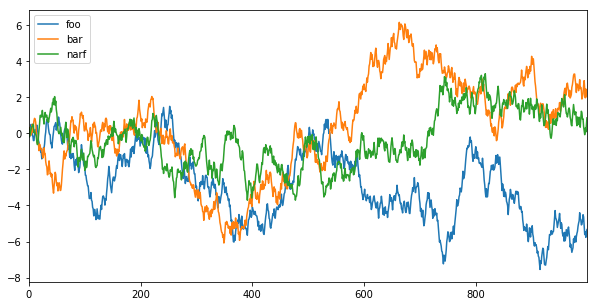

In [316]:
df.plot()

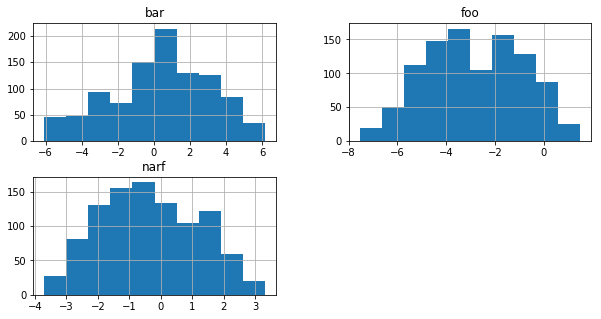

In [317]:
df.hist();

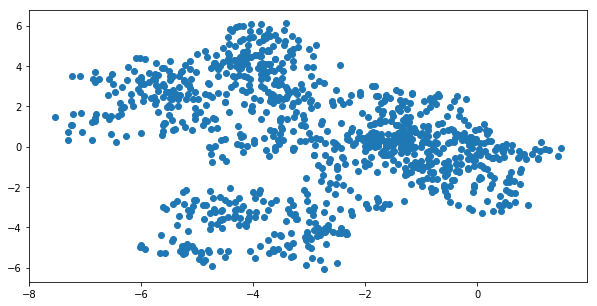

In [318]:
plt.scatter(df['foo'], df['bar']);

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).